In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df=pd.read_csv('data/stud.csv')

In [5]:
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
949,female,group E,high school,free/reduced,completed,57,75,73
921,female,group C,high school,free/reduced,none,35,53,46
546,female,group A,some high school,standard,completed,92,100,97
294,male,group D,high school,free/reduced,completed,78,77,80
545,male,group E,some high school,free/reduced,completed,78,83,80


In [6]:
df.shape

(1000, 8)

### Dataset information

##### gender : sex of students -> (Male/female)
##### race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
##### parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
##### lunch : having lunch before test (standard or free/reduced)
##### test preparation course : complete or not complete before test
##### math score
##### reading score
##### writing score

### Data Checks to perform


##### Check Missing Values

In [11]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

###### There are no missing values

##### Check duplicate Values

In [12]:
df.duplicated().sum()

np.int64(0)

##### There are no duplicated values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [18]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [19]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Exploring Data

In [26]:
for col in df.columns:
    print(f"Categories in {col} variable :",end=" ")
    print(df[col].unique())

Categories in gender variable : ['female' 'male']
Categories in race_ethnicity variable : ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable : ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable : ['standard' 'free/reduced']
Categories in test_preparation_course variable : ['none' 'completed']
Categories in math_score variable : [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Categories in reading_score variable : [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  4

In [28]:
numerical_features=[feature for feature in df.columns if df[feature].dtype!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

In [31]:
print(f"There are {numerical_features} numerical featurs ")
print(f"There are {categorical_features} categorical featurs ")

There are ['math_score', 'reading_score', 'writing_score'] numerical featurs 
There are ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] categorical featurs 


##### Adding "Total_Score" and "Average" column

In [34]:
df['Total_Score']=df['math_score']+df['reading_score']+df['writing_score']
df['Average_Score']=df['Total_Score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [40]:
reading_full=df[df['reading_score']==100]['Average_Score'].count()
math_full=df[df['math_score']==100]['Average_Score'].count()
writing_full=df[df['writing_score']==100]['Average_Score'].count()

In [41]:
print("No of students full marks in Maths is: ",math_full)
print("No of students full marks in Reading is: ",reading_full)
print("No of students full marks in writing is: ",writing_full)

No of students full marks in Maths is:  7
No of students full marks in Reading is:  17
No of students full marks in writing is:  14


In [43]:
reading_less_20 = df[df['reading_score'] <= 20]['Average_Score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['Average_Score'].count()
math_less_20 = df[df['math_score'] <= 20]['Average_Score'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


###### Best performance of students is in Reading.
###### Worst performance of students is in Writing.

### Exploring Data (Visualization)

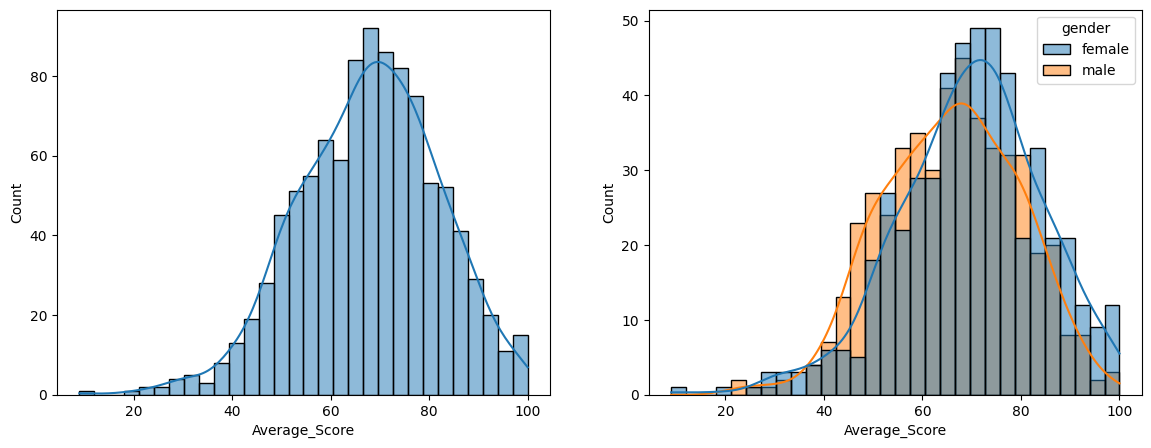

In [62]:
fig=plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.histplot(data=df,x='Average_Score',bins=30,kde=True)
plt.subplot(1,2,2)
sns.histplot(data=df,x='Average_Score',bins=30,kde=True,hue='gender')
plt.show()

###### Female students perform better than male students.

<Axes: xlabel='Average_Score', ylabel='Count'>

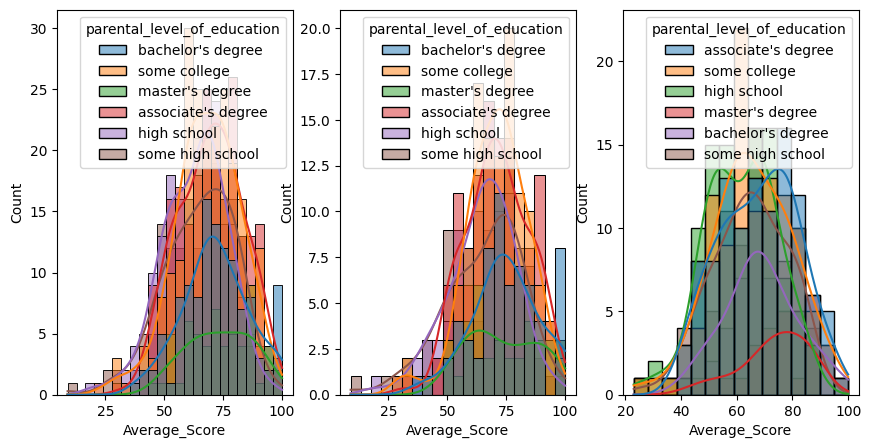

In [60]:
plt.figure(figsize=(14,5))
plt.subplot(141)
sns.histplot(data=df,x='Average_Score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average_Score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average_Score',kde=True,hue='parental_level_of_education')

##### in plot 1 there's no proof that parental level of education in students performance
##### in plot 2 for female students also parental level of education is not significant
##### in plot 3 for male students,parents having associate degree or masters degree,their male child tend to have a great performance

<Axes: xlabel='Average_Score', ylabel='Count'>

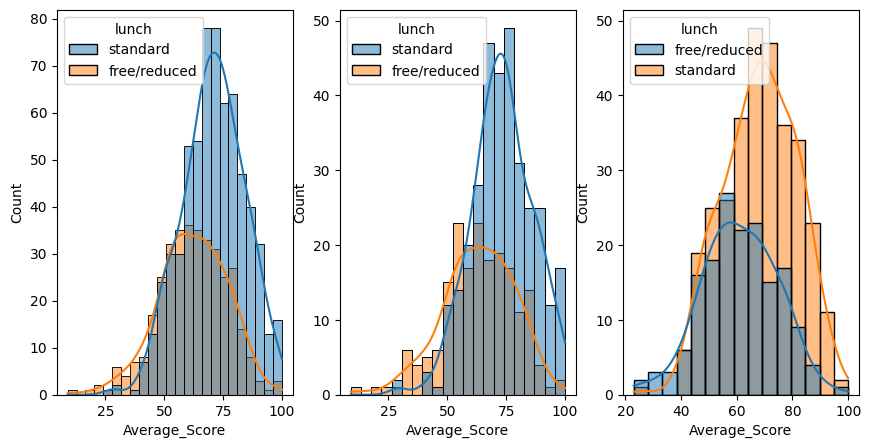

In [71]:
plt.figure(figsize=(14,5))
plt.subplot(141)
sns.histplot(data=df,x='Average_Score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average_Score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average_Score',kde=True,hue='lunch')

#####

##### Standard lunch helps in student performance
##### Standard lunch helps in student perforjmance be it male or female

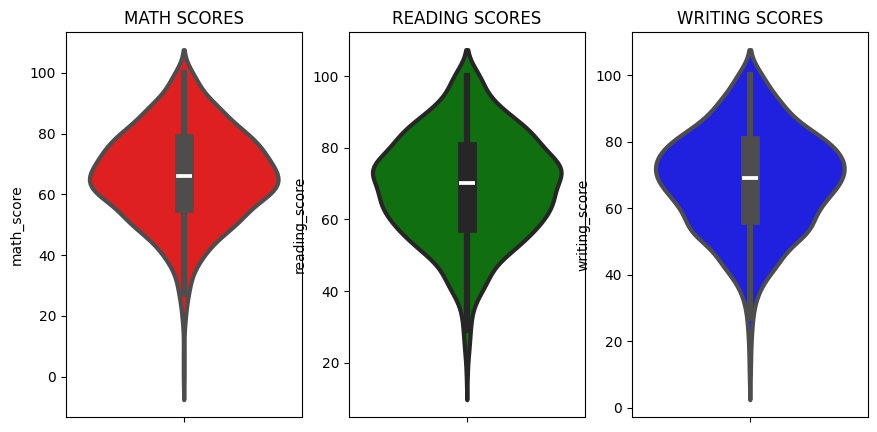

In [74]:
plt.figure(figsize=(14,5))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

#### Multivariate analysis using pieplot

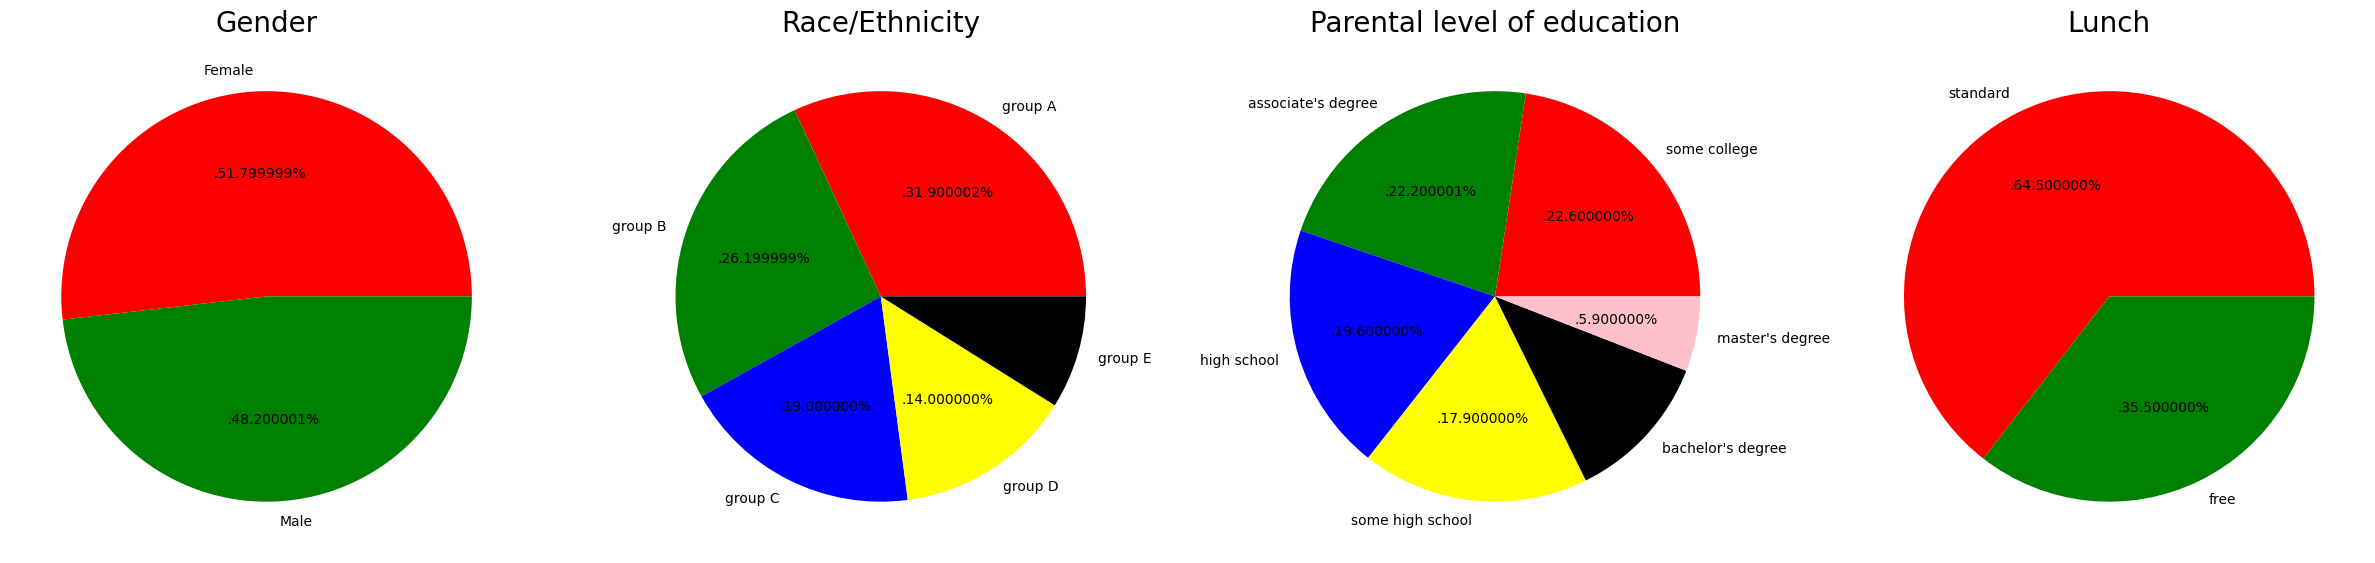

In [93]:
plt.rcParams['figure.figsize'] =(30,12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels='Female','Male'
colors=['red','green']

plt.pie(size,colors=colors,labels=labels,autopct='.%2f%%')
plt.title('Gender',fontsize=20)
plt.axis('off')

plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels='group A','group B','group C','group D','group E'
colors=['red','green','blue','yellow','black']

plt.pie(size,colors=colors,labels=labels,autopct='.%2f%%')
plt.title('Race/Ethnicity',fontsize=20)
plt.axis('off')

plt.subplot(1,5,3)
size=df['parental_level_of_education'].value_counts()
labels='some college',"associate's degree",'high school','some high school','bachelor\'s degree','master\'s degree'
colors=['red','green','blue','yellow','black','pink','orange','cyan']

plt.pie(size,colors=colors,labels=labels,autopct='.%2f%%')
plt.title('Parental level of education',fontsize=20)
plt.axis('off')

plt.subplot(1,5,4)
size=df['lunch'].value_counts()
labels='standard','free'
colors=['red','green']

plt.pie(size,colors=colors,labels=labels,autopct='.%2f%%')
plt.title('Lunch',fontsize=20)
plt.axis('off')

plt.tight_layout()
plt.axis('off')
plt.show()

##### Number of male and female students are almost equal.
##### Number of students in group C is more as commpared to other.
##### Number of students whose parental education is 'Some college' is closely followed by 'Associate degree'
##### Number of studentws whose lunch is 'Standard' are greater

### Univariate Analysis (How is distribution of Gender ?)

C:\Users\SAKSHAM\AppData\Local\Temp\ipykernel_20560\2713810337.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)


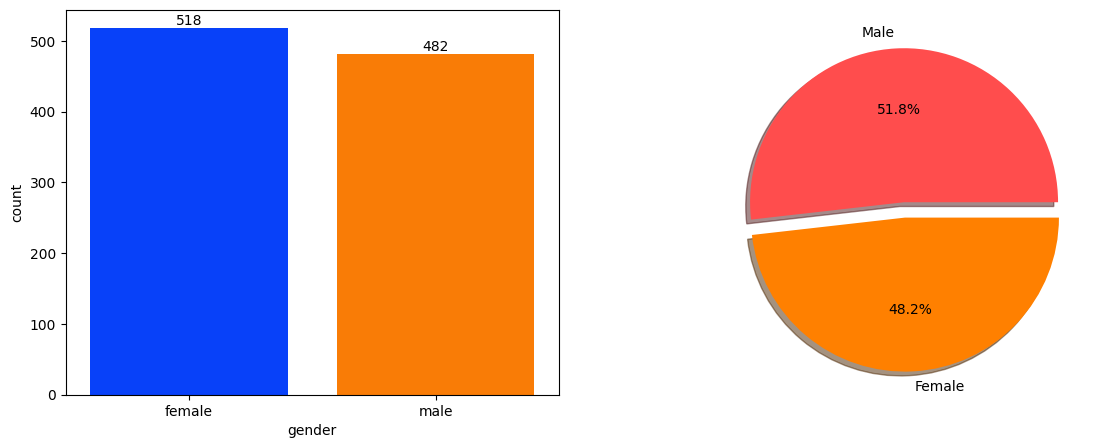

In [97]:
f,ax=plt.subplots(1,2,figsize=(14,5))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()


##### Gender has balanced data with female and male students

### BiVariate Analysis(Is gender has any impact on student's performance?)

In [102]:
grouped_mean=df.groupby('gender').mean()

TypeError: agg function failed [how->mean,dtype->object]